# Cookbook for Data Science

__A collection of definitions and code snippets for statistical analysis of data.__ 

Remark: <br>
Chapter 2 is mostly copy/pasted content from the internet. <br>
Chapters 3 to 7 I created myself from content of M248.<br>
This document still contains various mistakes.

Stephan Goldberg, May 2019. 



# Plotting

## A simple plot

Populating the interactive namespace from numpy and matplotlib


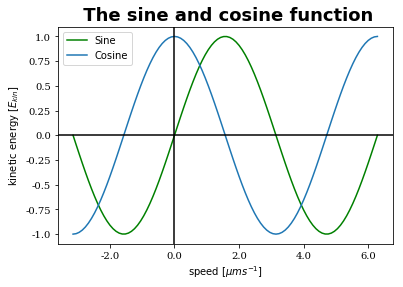

In [1]:
# Simple plot
%pylab inline

import matplotlib.pyplot as plt
import numpy as np

num_points = 100                      # define once, and reuse often
x_min, x_max = -np.pi , 2*np.pi          # define once, and reuse often

x_values = np.linspace(x_min, x_max, num_points)
y_values = np.sin(x_values)
p_values = np.cos(x_values)

# checking if the two arrays have the same length
assert len(x_values) == len(y_values) , \
    "lenght-mismatch: {:d} versus {:d}".format(len(x_values),len(y_values))
plt.plot(x_values, y_values,'g')# label="Population A") #adds a label to the line
#plt.legend()    #plot the label
plt.plot(x_values, p_values)


# default color is blue, 'r' is red, 'k' is black, 'g' is green
# default solid line, ':' is dottet, '--' is dashed
# '.' adds dot points, 'o' adds open circle points


# plt.xlim(2,3)       # optional argument to set min and max x- values
# plt.ylim(5,20)      # optional argument to set min and max y- values

# plt.axis('tight')    # optional argument to make the axis just fit the range of data without leaving space around it

# plt.axis ('equal')      # option argument to make both axis the same scale


# optional graph modifications
ax = plt.gca()          # get current axis - returns the objext that controls as many as 450 attributes of the plot

# Title of plot
ax.set_title( ' The sine and cosine function', size=18, weight='bold')
# plt.title( ' My first plot', size=24, weight='bold')  #alternative title on plot

# Axis lable of plot
ax.set_xlabel('speed [$\\mu m s^{-1}$]')
ax.set_ylabel('kinetic energy [$E_{kin}$]')
# Alternative axis lable of plot:
# plt.xlabel('speed')
# plt.ylabel('kinetic energy')

# Font
ax.set_xticklabels(ax.get_xticks(), family='serif', fontsize=10)
ax.set_yticklabels(ax.get_yticks(), family='serif', fontsize=10)

# Line style
# (changing after initial plot command)
lines = ax.get_lines()       # Lines is a list of line objects.
# Make the first line thick, dashed, and red
#plt.setp(lines[0], linestyle='--', linewidth=3, color='r')

# Legend
# adding a descriptive label for each line
#plt.plot(x_values, y_values, label="Population 1")
#plt.plot(x_values, y_values**3, label="Population 2")

# use line objects to set lables after plotting.
lines[0].set_label('Sine')
lines[1].set_label('Cosine')
#lines[1].set_label('Cured Poupulation')
ax.legend()

plt.axhline(0, color='black')
plt.axvline(0, color='black')


plt.show()

## Plotting multiple equations in same graph

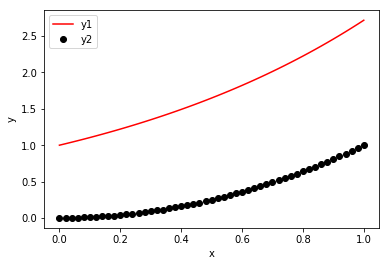

In [2]:
import matplotlib.pyplot as plt
import numpy as np


x = np.linspace(0,1,51)    # Define plotting range

y1 = np.exp(x)    # Define function y1
y2 = x**2         # Define function y2  

plt.plot(x,y1, 'r', x, y2, 'ko')
plt.xlabel('x')
plt.ylabel('y')

ax = plt.gca()
lines = ax.get_lines()
lines[0].set_label('y1')
lines[1].set_label('y2')
ax.legend()


plt.show()

## Linear equation plotting in 3D

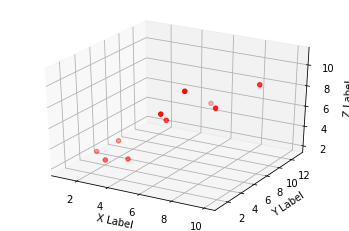

In [3]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x =[1,2,3,4,5,6,7,8,9,10]
y =[5,6,2,3,13,4,1,2,4,8]
z =[2,3,3,3,5,7,9,11,9,10]



ax.scatter(x, y, z, c='r', marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

##### Subplots

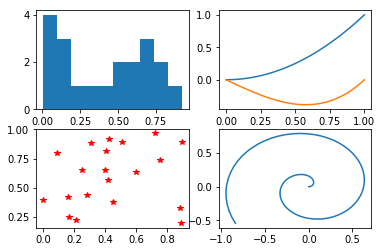

In [4]:
import numpy as np
from numpy.random import random
import matplotlib.pyplot as plt

t = np.linspace(0,1,100)

plt.figure()
plt.subplot(2,2,1); plt.hist(random(20))                            # Upper left
plt.subplot (2,2,2); plt.plot (t, t**2, t, t**3 - t)                # Upper right
plt.subplot (2,2,3); plt.plot(random(20), random(20), 'r*')         # Lower left
plt.subplot (2,2,4); plt.plot (t*np.cos(10*t) , t*np.sin (10*t))    # Lower right

plt.savefig('The_greatest_figure.pdf')

plt.show()

## 3D color surface plot

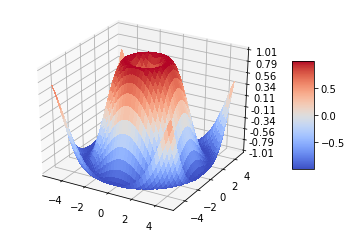

In [5]:
'''
======================
3D surface (color map)
======================

Demonstrates plotting a 3D surface colored with the coolwarm color map.
The surface is made opaque by using antialiased=False.

Also demonstrates using the LinearLocator and custom formatting for the
z axis tick labels.
'''

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

## A function with two variables

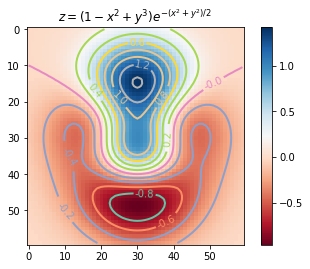

In [6]:
from numpy import exp, arange
from pylab import meshgrid, cm, imshow, contour, clabel, colorbar, axis, title, show


# the function that I'm going to plot
def z_func(x, y):
    return (1 - (x ** 2 + y ** 3)) * exp(-(x ** 2 + y ** 2) / 2)

# make data
x = arange(-3.0, 3.0, 0.1)
y = arange(-3.0, 3.0, 0.1)
X, Y = meshgrid(x, y)  # grid of point
Z = z_func(X, Y)  # evaluation of the function on the grid

im = imshow(Z, cmap=cm.RdBu)  # drawing the function
# adding the Contour lines with labels
cset = contour(Z, arange(-1, 1.5, 0.2), linewidths=2, cmap=cm.Set2)
clabel(cset, inline=True, fmt='%1.1f', fontsize=10)
colorbar(im)  # adding the colobar on the right
# latex fashion title
title('$z=(1-x^2+y^3) e^{-(x^2+y^2)/2}$')
show()

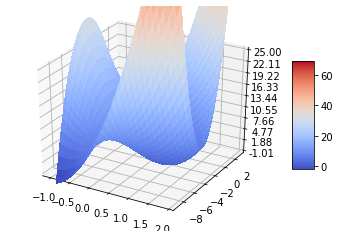

NameError: name 'axes3d' is not defined

In [7]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

fig = plt.figure()
ax = fig.gca(projection='3d')

# the function that I'm going to plot
def z_func(x, y):
    return (8*x**2 + x*y**2 + 6*x*y - 7*x +8)

# make data
x = np.arange(-1.0, 2.0, 0.1)
y = np.arange(-9.0, 3.0, 0.1)
X, Y = np.meshgrid(x, y)  # grid of point
Z = z_func(X, Y)  # evaluation of the function on the grid

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 25)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

X, Y, Z = axes3d.get_test_data(0.05)
ax.plot_surface(X, Y, Z, rstride=8, cstride=8, alpha=0.3)
cset = ax.contour(X, Y, Z, zdir='z', offset=-100, cmap=cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='x', offset=-40, cmap=cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='y', offset=40, cmap=cm.coolwarm)

ax.set_xlabel('X')
ax.set_xlim(-1, 1)
ax.set_ylabel('Y')
ax.set_ylim(-9, 3)
ax.set_zlabel('Z')
ax.set_zlim(-1, 50)

plt.show()

## Contour plot

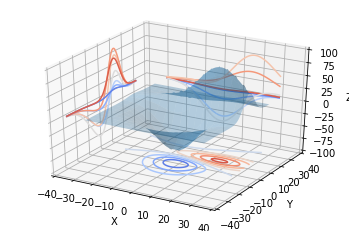

In [8]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm

fig = plt.figure()
ax = fig.gca(projection='3d')
X, Y, Z = axes3d.get_test_data(0.05)
ax.plot_surface(X, Y, Z, rstride=8, cstride=8, alpha=0.3)
cset = ax.contour(X, Y, Z, zdir='z', offset=-100, cmap=cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='x', offset=-40, cmap=cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='y', offset=40, cmap=cm.coolwarm)

ax.set_xlabel('X')
ax.set_xlim(-40, 40)
ax.set_ylabel('Y')
ax.set_ylim(-40, 40)
ax.set_zlabel('Z')
ax.set_zlim(-100, 100)

plt.show()

## Histogram

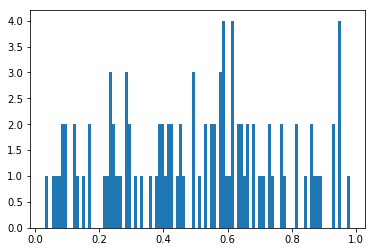

In [9]:
from numpy.random import random as rng
import matplotlib.pyplot as plt

data = rng(100)

plt.hist(data, bins=100, align='mid')

plt.show()

## 3D plot of linear euquations

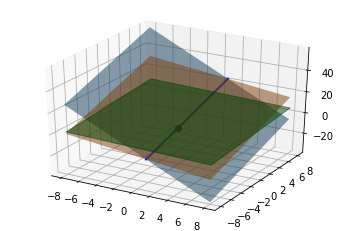

In [10]:
''' demonstration of a 3D plot of linear equations'''

import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x, y = np.linspace(-8,8,100), np.linspace(-8,8,100)
X, Y = np.meshgrid(x,y)
Z1 = 11 - 4*X + 2*Y
Z2 = (16 - 2*X + 4*Y) / 2
Z3 = (17 - X + 2*Y) / 4

ax.plot_surface(X,Y,Z1, alpha=0.5, rstride=100, cstride=100)
ax.plot_surface(X,Y,Z2, alpha=0.5, rstride=100, cstride=100)


ax.plot((1,1),(-8,8),(-9,23), lw=2, c='b')
ax.plot_surface(X,Y,Z3, alpha=0.5, facecolors='g', rstride=100, cstride=100)
ax.plot((1,),(-2,),(3,), lw=2, c='k', marker='o')

plt.show()

## Importing and Exporting Data

In [11]:
"""
Created: 2018
Author: Stephan Goldberg (Python 3.4)

Description:
Importing and Exporting Data

"""

import numpy as np

# 1. import method:
# import data from local directory, specifying that it is a csv file
data_set = np.loadtxt("HIVseries.csv", delimiter=',')

# 2. import method:
# specifiying the complete path of a file on local computer
data_file = '/Users/stephangoldberg/Google Drive/Python Projects/MathProblems/PMLSdata/01HIVseries/HIVseries.csv'
data_set02 = np.loadtxt(data_file, delimiter=',')

# 3. import method:
# specifying home directory, data directory once, to safe work later:
home_dir = '/Users/stephangoldberg/Google Drive/Python Projects/MathProblems/'
data_dir = home_dir + 'PMLSdata/01HIVseries/'
data_set03 = np.loadtxt(data_dir+ 'HIVseries.csv', delimiter=',')

# 4. importing other kinds of text
# to be used when line by line is to be imported
my_file = open('HIVseries.csv')
temp_data = []              # creates an object that can read the data file
for line in my_file:
    print(line)
    x, y = line.split(',')  # uses split line method to break the line into numbers using the comma as a separator
    temp_data += [(float(x), float(y))] #converts text into numbers
my_file.close()
data_set04 = np.array(temp_data)

# 5. direct web import
import urllib.request
web_file = urllib.request.urlopen( " http://www.physics.upenn.edu/biophys/PMLS/Datasets/01HIVseries/HIVseries.csv")
data_set05 = np.loadtxt(web_file, delimiter = ',')

# saving data
x = np.linspace(0,1,1001)
y = 3* np.sin(x)**3 - np.sin(x)

np.save('x_values', x)
np.save('y_values', y)

np.savetxt('x_values.dat',x)
np.savetxt('y_values.dat', y)

np.savez ('xy_values', x_vals=x, y_vals=y)

# recovering data
x2 = np.load('x_values.npy')
y2 = np.loadtxt('y_values.dat')
w = np.load('xy_values.npz')

print(w.keys())
x2 == x
y2 == y
w['x_vals'] == x
w['y_vals'] == y

# Writing information directly into a file:

my_file = open('power.txt', 'w')        # opens file and prepares it with 'w' writing
print('N \t\t2**N\t\t3**N')             # print labels for columns, also '\t' inserts a new tab (alternatively '\n' inserts a new line)
print('---\t\t----\t\t----')            # print separator.

my_file.write('N \t\t2**N\t\t3**N')     # write lables to file
my_file.write('---\t\t----\t\t----')    # write separators to file

#%% Loop over integers from 0 1- 10 and print/write results
for N in range(11):
    print('{:d}\t\t{:d}\t\t{:d}'.format(N, pow(2,N), pow(3,N)))
    my_file.write('{:d}\t\t{:d}\t\t{:d}'.format(N, pow(2,N), pow(3,N)))
my_file.close()                         # the file must be closed again when finished

print(my_file)a

SyntaxError: invalid syntax (<ipython-input-11-aa43a32f6a7b>, line 81)

# Statistics Basics

Importing the python libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


__Terminology: (cited from page 10, unit 1)__
-  __Observations ___ (or __cases__, or __sampling units__) refer to objects (people, countries, . . . ) on which characteristics are recorded.
-  __Variables__ are the characteristics recorded, and the pattern of variation of a variable is its distribution.
-  Variables are __linked__ if they are each recorded for the same observations.
-  A variable is __continuous__ if its values are numerical and all values in an interval are possible.
-  A variable is __discrete__ if its values are numerical but only particular values (typically, integers) are possible.
-  A variable is __categorical__ if its values indicate to which group an observation belongs.
-  A categorical variable is __ordinal__ if its values correspond to labels which have a natural ordering.
-  A categorical variable is __nominal__if its values correspond to labels but the labels do not have a natural ordering.

## A bar chart

A bar chart is usually used for categorical data or with numerical data that are discrete. 

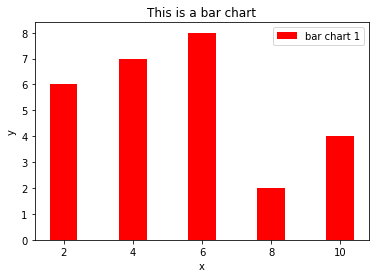

In [2]:
x = [2,4,6,8,10]
y = [6,7,8,2,4]

plt.bar(x,y,label = 'bar chart 1', color='r')

plt.xlabel('x')
plt.ylabel('y')
plt.title('This is a bar chart')
plt.legend()
plt.show()

## A histogram chart

-  A histogram chart is generally used with continuous data.  <br>
-  Histograms need a reasonably large dataset and are sensitive to the choice of cutpoints.

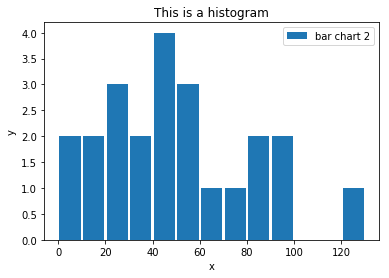

In [41]:
population_ages = [12,34,65,87,23,123,3,7,45,92,54,74,41,21,98,34,43,10,20,50,40,85,52,]

bins = [0,10,20,30,40,50,60,70,80,90,100,110,120,130]

plt.hist(population_ages, bins, histtype = 'bar', rwidth = 0.9, label = 'bar chart 2')

plt.xlabel('x')
plt.ylabel('y')
plt.title('This is a histogram')
plt.legend()
plt.show()

## A frequency histogram (according to M248)

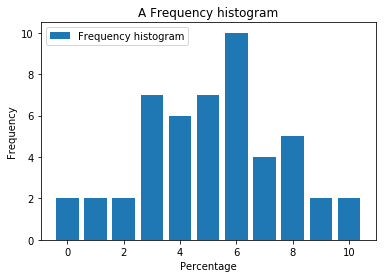

In [95]:
frequency = [2, 2, 2, 7, 6, 7, 10, 4, 5, 2, 2]
y_pos = np.arange(len(frequency))
plt.bar(y_pos, frequency, label = 'Frequency histogram' )

plt.xlabel('Percentage')
plt.ylabel('Frequency')
plt.title('A Frequency histogram')
plt.legend()
plt.show()

__Frequency histogram according to https://www.mathsisfun.com/definitions/frequency-histogram.html__

note: the occurances of values of same magnitude are stacked!!!

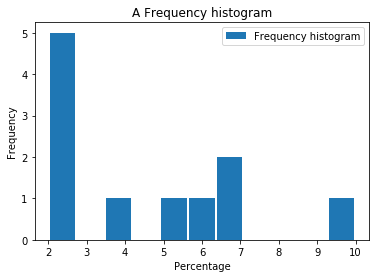

In [47]:
plt.hist(frequency, bins=11, histtype = 'bar', rwidth = 0.9, label = 'Frequency histogram' )

plt.xlabel('Percentage')
plt.ylabel('Frequency')
plt.title('A Frequency histogram')
plt.legend()
plt.show()

Defining a new data set:

In [4]:
data = [3,7,23,56,324,234,56,23,456,1223,78,432,23,456,756,85,345,234,234,]

## Sample Size
The sample size is the number of observations a dataset contains:

In [5]:
len(data)

19

## Sorting the data:

In [6]:
data_sorted = np.sort(data)
data_sorted

array([   3,    7,   23,   23,   23,   56,   56,   78,   85,  234,  234,
        234,  324,  345,  432,  456,  456,  756, 1223])

## The sample mean:
If the $n$ values in a dataset are denoted $x_1$, $x_2$, $x_3$,...$x_n$, then the __sample mean__, which is denoted $\bar{x}$ is given by


$\bar{x} = \dfrac{x_1 +x_2 +x_3 +n_n}{n} = \frac{1}{n} \sum \limits_{i=1}^{n} x_i$

it is also called the 'average'.

In [7]:
x_bar = sum(data) /len(data)
x_bar

265.6842105263158

__Mean in numpy:__

In [8]:
mean = np.mean(data)
mean

265.6842105263158

## The population mean:

The population mean (or mean or expected value or expectation) of a random variable is given:
 - if X is discrete with p.m.f $p(x)$, by
 $$ \mu = E(X) = \sum_x x p(x) $$
 - if X is continuous with p.d.f. $f(x)$, by
 $$ \mu = E(X) = \int x f(x) $$
 where the integral is taken over all values $x$ in the range of $X$.

## The sample median:

The sample median is defined as 'the middle value' of the dataset.

$m = x_{\left(\frac{1}{2}(n+1)\right)}$

-  if $n$ is even, then the sample median lies exactly half way between the two centre values.
-  the median, just like the interquartile range are more resistant to unusual values in the data than are the mean and the standard deviation.

__Median in numpy:__

In [9]:
np.median(data)

234.0

## The sample quartiles:

Let a dataset $x_1$, $x_2$, $x_n$, $n=3,4,...$ be recorded as $x_{(1)}$, $x_{(2)}$, $x_{(n)}$. <br>
Then the __sample lower quartile__, $q_L$, is given by 

> $q_L = x_{\left(\frac{1}{4}(n+1)\right)}$

and the __sample upper quartile__, $q_U$, is given by 

> $q_U = x_{\left(\frac{3}{4}(n+1)\right)}$


!!! Note: numpy and pandas define quartiles different than M248 or Minitab !!! (see page 37, unit 1)!!!

__Upper and lower quartiles in numpy:__

In [10]:
print( np.percentile(data,25))
print( np.percentile(data,75))


39.5
388.5


__Upper and lower quartiles in pandas:__

In [11]:
df = pd.DataFrame(data)

print( df.quantile(0.25))
print( df.quantile(0.75))

0    39.5
Name: 0.25, dtype: float64
0    388.5
Name: 0.75, dtype: float64


In [12]:
a = [19.1, 17.4, 23.7, 22.3, 16.7, 22.6]

__Upper and lower quartiles in M248 (and Minitab):__

First, ensure that the data is sorted in ascending order.

In [17]:
data1 = [66,72,79,84,102,110,123,144,162,169,414]

__Lower quartile for data-set with n+1 divisable by 4:__

In [18]:
len(data1)+1

12

In [19]:
q_L = data1[int(0.25*(len(data1)+1))-1]
print (q_L)

79


__Upper quartile for data-set with n+1 divisable by 4__:

In [20]:
q_U = data1[int(0.75*(len(data1)+1))-1]
print (q_U)

162


__Lower quartile for data-set with n+1 NOT divisible by 4__:

removing the outlier in the data-set (to make it undividable by 4):

In [29]:
del data1[-1]
print(data1)

[66, 72, 79, 84, 102, 110, 123, 144, 162]


finding the position of the integer value $x_n$ and the corresponding $\frac{3}{4}$-fraction of the lower quartile in the new data set and then finding the lower quartile:

In [30]:
x_n = int((len(data1)+1)*0.25)-1
fraction = 0.75* (data1[x_n+1] - data1[x_n])

lower_quartile = data1[x_n]+fraction
print(lower_quartile)

77.25


__Upper quartile for n+1 NOT divisable by 4):__

finding the position of the integer value $x_n$ and the corresponding $\frac{1}{4}$-fraction of the upper quartile in the new data set, and then findin the upper quartile:

In [31]:
x_n = int((len(data1)+1)*0.75)-1
fraction = 0.25* (data1[x_n+1] - data1[x_n])

upper_quartile = data1[x_n]+fraction
print(upper_quartile)

128.25


## The sample interquartile range

The__ sample interquartile range __ is defined as <br>
$q_U - q_L$, <br>
where $q_U$ is the sample upper quartile and $q_L$ is the sample lower quartile.

In [32]:
sample_interquartile_range = q_U - q_L
print(sample_interquartile_range)

83


## The standard deviation


If $n$ values in a dataset are denoted $x_1, x_2, ... , x_n$ and their sample mean is <br>
$\bar{x}=\frac{1}{n} \sum \limits_{i=1}^{n} x_i$, <br>
then the __sample standard deviation__, $s$ is defined by:<br>
$s=\sqrt{\dfrac{1}{n-1} \sum \limits_{i=1}^{n} (x_i - \bar{x} )^2}$

In [33]:
data = [ 19.1, 17.4, 23.7, 22.3, 16.7, 22.6]

In [37]:
x_bar = sum(data) / len(data)
total=0
for i in range(0,len(data)):
   total = total + (data[i] - x_bar)**2
s = np.sqrt(1/(len(data) - 1 ) * total)
s

2.9549957698785296

## The sample variance


The square of the standard deviation is the sample variance. Hence it is given by:<br>
$s^2=\dfrac{1}{n-1} \sum \limits_{i=1}^{n} (x_i - \bar{x} )^2$

In [36]:
x_bar = sum(data) / len(data)
total=0
for i in range(0,len(data)):
   total = total + (data[i] - x_bar)**2
s_squared = 1/(len(data) - 1 ) * total
s_squared

8.732000000000005

## Unit-area histogram

A __unit-area histogram__ is a frequency histogram in which the frequencies are scaled so that the total area of the bars in the histogram is 1

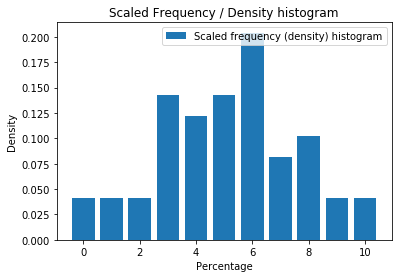

In [53]:
frequency = [2, 2, 2, 7, 6, 7, 10, 4, 5, 2, 2]
y_pos = np.arange(len(frequency))

scaled_frequency = frequency/np.sum(frequency)

plt.bar(y_pos, scaled_frequency, label = 'Scaled frequency (density) histogram' )

plt.xlabel('Percentage')
plt.ylabel('Density')
plt.title('Scaled Frequency / Density histogram')
plt.legend()
plt.show()

A non-scaled histogram:

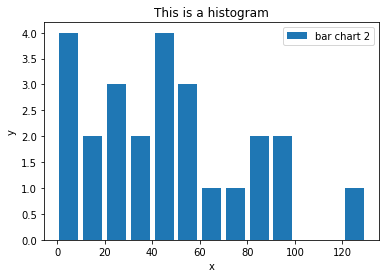

In [71]:
population_ages = [2,5,12,34,65,87,23,123,3,7,45,92,54,74,41,21,98,34,43,10,20,50,40,85,52,]

bins = [0,10,20,30,40,50,60,70,80,90,100,110,120,130]

plt.hist(population_ages, bins, histtype = 'bar', rwidth = 0.8, label = 'bar chart 2')
plt.xlabel('x')
plt.ylabel('y')
plt.title('This is a histogram')
plt.legend()
plt.show()


## A Scatterplot

A scatterplots are used to investigate the relationship between two numercial variables. 

No handles with labels found to put in legend.


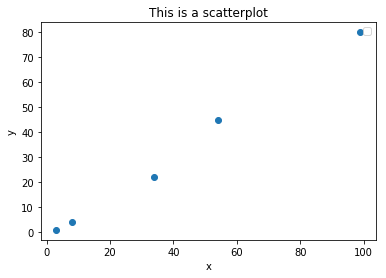

In [73]:
x = [3,8,34,54,99]
y = [1,4,22,45,80]
plt.xlabel('x')
plt.ylabel('y')
plt.title('This is a scatterplot')
plt.legend()
plt.scatter(x, y,label = 'scatterplot')
plt.show()

__Scatterplot Interpretation checklist__

1. Is the relationship positive, negative or neither?
2. Is the relationship linear or non-linear?
3.  Is the relationship strong or weak?
4. Are there any outliers?

## A boxplot

-  A boxplot, just like the histogram is also used with continuous data. <br>
-  Boxplots cannot show how many modes a distribution has. <br>
-  Comperative boxplots allow more than one continuous variable to be displayed.

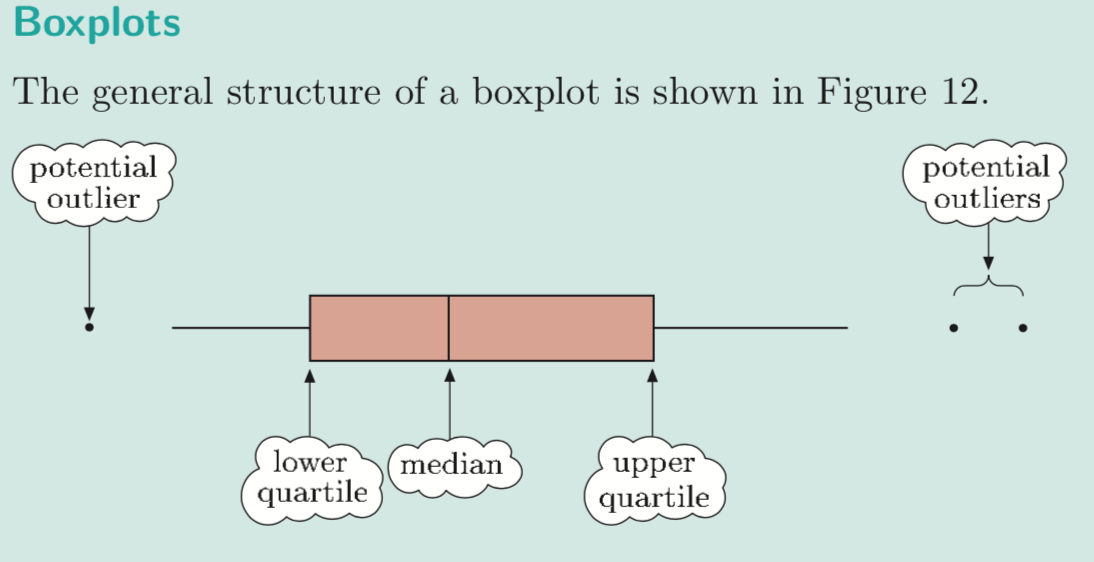

In [57]:
from IPython.display import Image
Image(filename = "images/boxplot.png" , width = 400, height = 200)

In [58]:
data_box = [3,7,23,56,324,234,56,23,456,1223,78,432,23,456,756,85,345,234,234,]

{'boxes': [<matplotlib.lines.Line2D at 0x118b8f208>],
 'caps': [<matplotlib.lines.Line2D at 0x118c19fd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x118c23898>],
 'means': [<matplotlib.lines.Line2D at 0x118c23518>],
 'medians': [<matplotlib.lines.Line2D at 0x118c19390>],
 'whiskers': [<matplotlib.lines.Line2D at 0x118b8f470>,
  <matplotlib.lines.Line2D at 0x118c19e48>]}

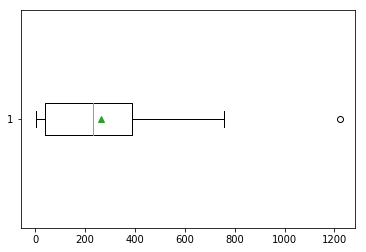

In [59]:
plt.boxplot(data_box, showmeans=True, vert=False)

# P.D.F. and C.D.F

## P.d.f. Probability distribution functions (Excercise 8)

The integral over the interval over the range (0, 1) evaluates to 1.0


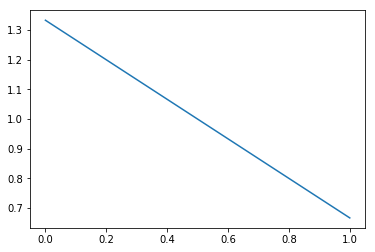

In [65]:
from scipy.integrate import quad

num_points = 100                    
x_min, x_max = 0 , 1         

x = np.linspace(x_min, x_max, num_points)

def integrand(x):
    return 2/3 * (2-x)  # insert function here

ans, err = quad(integrand, x_min, x_max)
print ("The integral over the interval over the range (" + str(x_min) + ", " + str(x_max) + ") evaluates to " +str(ans))

plt.plot(x, integrand(x))

## C.d.f. Comulative distribution function (Activity 24)

__a)__

In [70]:
def F(x):
    return x**3
a = F(3/4)-F(1/2)
Fraction (a)

Fraction(19, 64)

In [72]:
def F(x):
    return x**3
a = 1- F(0.6)
a

0.784

In [75]:
def F(x):
    return x**3
a = F(0.6)-F(0.1)
round(a,3)

0.215

__b__

__i)__

In [77]:
def F(x):
    return x/5 - x**2/500 -16/5 
a = 1-F(22)
round(a,3)

0.768

__ii)__

In [78]:
def F(x):
    return x/5 - x**2/500 -16/5 
a = F(29)-F(21)
round(a,3)

0.8

## P.d.f. and c.d.f.(Activity 25)

__a)__

As seen from the graph, f(x)>0 for all x. 
We test if the integral of f(x) with respect to x is 1:

Populating the interactive namespace from numpy and matplotlib
The integral over the interval over the range (0, 2) evaluates to 1.0


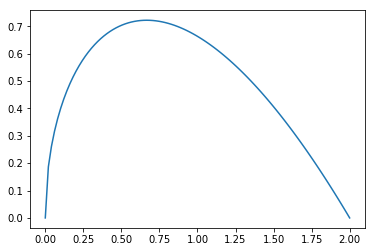

In [8]:
from scipy.integrate import quad
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

num_points = 100
x_min, x_max = 0 , 2         
x = np.linspace(x_min, x_max, num_points)

def integrand(x):
    return 15/(16*np.sqrt(2)) * np.sqrt(x) * (2-x)  # insert function here

ans, err = quad(integrand, x_min, x_max)
print ("The integral over the interval over the range (" + str(x_min) + ", " + str(x_max) + ") evaluates to " +str(round(ans,3)))

plt.plot(x, integrand(x))

__c)__

In [9]:
def F(x):
    return (x*np.sqrt(x))/(8*np.sqrt(2))*(10- 3*x)
1-F(1)

0.381281566461771

the probability is 38% that the bulldozers return time is greater than a minute.

__d)__ 

In [10]:
F(1)-F(0.5)

0.353093433538229

the probabilit is 35.3% (to three s.f.) that the bulldozer returns between 30 seconds and one minute 

## P.d.f. and c.d.f. (Exercise 10)

__a)__

Populating the interactive namespace from numpy and matplotlib
The integral over the interval over the range (3, 6) evaluates to 1.0


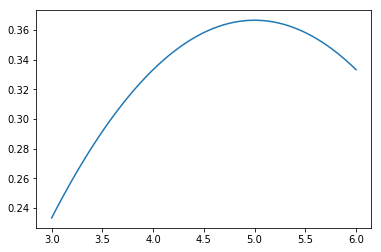

In [11]:
from scipy.integrate import quad
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

num_points = 100
x_min, x_max = 3 , 6                          # insert limits here
x = np.linspace(x_min, x_max, num_points)

def integrand(x):
    return 1/30 *(10*x- x**2 - 14)            # insert function here

ans, err = quad(integrand, x_min, x_max)
print ("The integral over the interval over the range (" + str(x_min) + ", " + str(x_max) + ") evaluates to " +str(round(ans,3)))

plt.plot(x, integrand(x))

The integral over the interval is 1 and the function is non-negative over the interval, so yes, $f$ is a valid p.f.d..

__c)__

In [12]:
def F(x):
    return 1/30*(5*x**2 - 1/3* x**3 - 14*x +6)
F(4)

0.28888888888888903

In [13]:
F(5) - F(4)

0.3555555555555557

### TMA 01, Question 2 b) ii)

We plot $f(x)$ in for the range {0,6}:

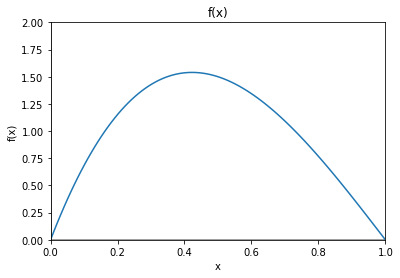

In [28]:
# defining the plotting limits:
xmin, xmax, ymin, ymax, number_of_dots = 0, 1, 0, 2, 100   #fill limits in here

# defining f(x) and x:
def f(x):
    return 4*x*(1-x)*(2-x)                                 #fill function in here
x = np.linspace(xmin , xmax , number_of_dots)

# plotting:
plt.xlim(xmin, xmax),plt.ylim(ymin, ymax),plt.axhline(0, color="grey"),plt.axvline(0, color="grey")
plt.ylabel('f(x)'), plt.xlabel('x'),plt.title('f(x)'), 
plt.plot(x, f(x))

# Discrete Probability Distributions


__The mean of a discrete distribution with p.m.f.
$p(x)$:__
$$\mu = E(X)=\sum x p(x) $$

__The variance of a discrete random variable with p.m.f. $p(x)$:__ $$\sigma^2 = V(X)=E[(X-\mu)^2]= \sum (x-\mu)^2 p(x) $$
also:
$$ \sigma^2 = V(X)= E(X^2)-\mu^2$$
("the variance equals the mean of the squares minus the square of the mean")

__The standard variation:__
$$\sigma = S(X) = \sqrt{V(X)}$$

__Mean and variance of linear functions:__

If Y is a linear function of $X$, so that $Y= aX +b$, where $a$ and $b$ are constants, then:

$$ E(Y) = a E(X) +b$$
and
$$ V(Y) = a^1 v(X)$$

## Bernoulli distribution, Bernoulli ($p$)

A single bernoulli trial with probability $p$. 

__Examples:__
 - the probability of obtaining heads on a fair coin toss.
 - whether it rains in the Atacama desert in a certain year, or not

__The mean:__ $$\mu = E(X)=p $$

__The variance:__ 
$$\sigma ^2 = V(X)=p (1-p) $$

__The p.m.f.  $X \sim Bernoulli(p)$:__

$$p(1) = 1, \ \ \ \ \ p(0) = 0$$
or
$$p(x) = p^x (1-p)^{1-x} \ \ \ \ \ \ \ x = 0,1.$$

## Binomial distribution, $B(n,p)$

A binomial distribution is a number of events (bernoulli trials) with probability $p$ happening in a given sample size $n$.

__Examples:__
 - the number of defective items coming from a production line in a sample of 100.
 - the number of arrows from an archer that hit the centre of the target
 - the number of matches a tennis player wins against his friend in a series of matches.

__The mean:__ $$\mu = E(X)=np $$

__The variance:__ 
$$\sigma ^2 = V(X)=np (1-p) $$

__The p.m.f.  $X \sim B(n,p)$:__

$$p(x) = \binom{n}{x} p^x (1-p)^{n-x} \ \ \ \ \ \ \ \ x=0,1,3,...,n$$

In [5]:
# p.m.f. of binomial distribution

def factorial(n):
    if n == 0:
        return 1
    else:
        return n * factorial(n-1)

# n = total number of Bernoulli trials
# p = probability of positive outcome
# X = number of trials with a positive outcome

def B(n,p ,X):
    return factorial(n) / factorial(X) / factorial (n-X) * p**X * (1-p)**(n-X)

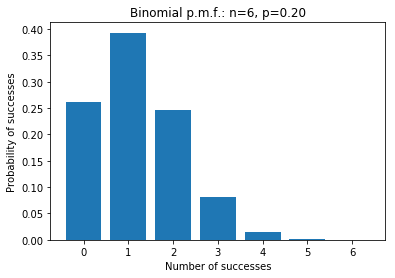

In [4]:
# graph of p.m.f. of binomial distribution

import scipy, scipy.stats
import matplotlib.pyplot as plt

n = 6                              # number of trials
p = 0.2                            # probability of each successfull outcome

x = scipy.linspace(0,n,n+1)
binomial = scipy.stats.binom.pmf(x,n,p)

plt.bar(x, binomial)

plt.xlabel('Number of successes')
plt.ylabel('Probability of successes')
plt.title('Binomial p.m.f.: n=%i, p=%.2f' % (n,p))
plt.show()

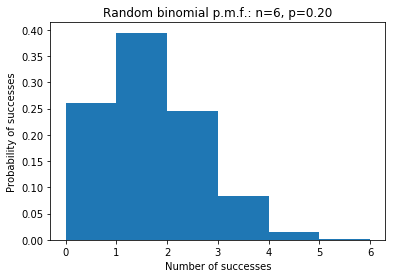

In [34]:
# alternative graph of p.m.f.  of binomial distribution

import scipy, scipy.stats
import numpy as np
import matplotlib.pyplot as plt

n = 6                            # number of trials
p =  0.2                        # probability of each successfull outcome
number_of_runs = 10000           # number of simulation runs               

binom_sim = scipy.stats.binom.rvs(n,p,size=number_of_runs)  

plt.hist(binom_sim, bins = n, normed = True)

plt.xlabel('Number of successes')
plt.ylabel('Probability of successes')
plt.title('Random binomial p.m.f.: n=%i, p=%.2f' % (n,p))
plt.show()

## Geometric distribution, $G(p)$

A geometric distribution is a series $n$ of bernoulli trials until the outcome with probability $p$ is positive.

__Examples:__
 - the number of times a fair coin needs to be tossed to obtain 'heads'
 - the number of times a die needs to be rolled to obtain a 6.
 - the number of times a tennis player needs to play against his friend, until he wins.

__The mean:__ $$\mu = E(X)=\dfrac{1}{p} $$

__The variance:__ 
$$\sigma ^2 = V(X)=\dfrac{1-p}{p^2} $$

__Dispersion:__
A geometric distribution is:
 - under-dispersed when $\dfrac{(1-p)}{p} <1$
 - equi-dispersed when $\dfrac{(1-p)}{p} =1$
 - over-dispersed when $\dfrac{(1-p)}{p} >1$

__The p.m.f. $X \sim G(p)$:__

$$ p(x) = P(X=x) = (1-p)^{x-1}p, \ \ \ \ \ \ \ x=1,2,3,....$$

__The c.d.f. :__
$$ F(x) = P(X \leq x)= 1 - (1-p)^x, \ \ \ \ \ \ \ x =1,2,3,...$$

In [5]:
# geometric p.m.f. 

def G(p,x):        
    return (1-p)**(x-1) * p    

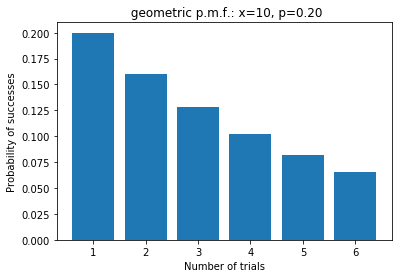

In [121]:
# graph of geometric p.m.f.

import scipy, scipy.stats
import matplotlib.pyplot as plt

X = 6                              # number of trials
p = 0.2                            # probability of each successfull outcome

x = scipy.linspace(1,X,X)
geometrical = scipy.stats.geom.pmf(x,p)

plt.bar(x, geometrical)

plt.xlabel('Number of trials')
plt.ylabel('Probability of successes')
plt.title(' geometric p.m.f.: x=%i, p=%.2f' % (n,p))
plt.show()

In [53]:
# geometric c.d.f.

def F(p,x):        
    return 1 - (1-p)**(x)     

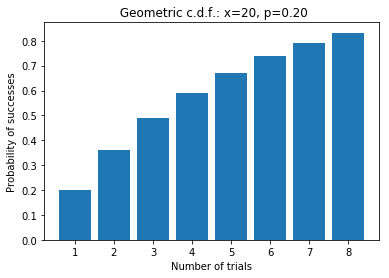

In [90]:
# graph of geometric c.d.f.

import scipy, scipy.stats
import matplotlib.pyplot as plt

X = 8                             # number of trials
p = 0.2                            # probability of each successfull outcome

x = scipy.linspace(1,X,X)
geometrical = scipy.stats.geom.cdf(x,p)

plt.bar(x, geometrical)

plt.xlabel('Number of trials')
plt.ylabel('Probability of successes')
plt.title(' Geometric c.d.f.: x=%i, p=%.2f' % (n,p))
plt.show()

## Poisson distribution, ($\lambda$)

__Examples:__
 - the number of claims on a motor insurance policy over a certain period
 - the number of yeast cells found in a randomly chose small square on a microscope slide


__The mean:__ $$\mu = E(X)=\lambda $$

__The variance:__ 
$$\sigma ^2 = V(X)=\lambda $$

Comment: whenever it is suggested that the poisson distribution model is to be used to model a data-set, calculate the mean and the variance of the sample data. If they are close to each other, a possion is likely to be a good model to be used.

__The p.m.f $X\sim Poisson(\lambda)$:__

$$p(x) = \dfrac{e^{-\lambda} \lambda^x }{x!} \ \ \ \ \ \ \ x= 0,1,2,...$$ 
, where$$\lambda = \frac{n}{t}$$

, where $n$ is the number of observed occurances per unit of time/space, and $t$ is the unit of time/space.

In [6]:
# The Poisson p.m.f.

import numpy as np 

def factorial(k):
    if k == 0:
        return 1
    else:
        return k * factorial(k-1)

def P(x,Lambda):        
    return (np.exp(-Lambda) * Lambda**x  ) / factorial(x)    # poisson p.m.f.

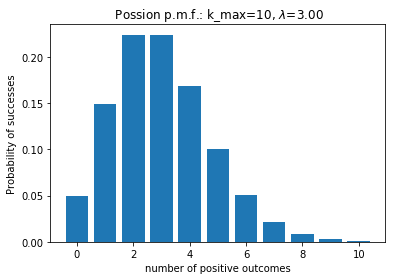

In [4]:
# graph of poisson p.m.f.:

import scipy, scipy.stats
import numpy as np
import matplotlib.pyplot as plt

k = 10                                   # maximum number of occurances
Lambda = 3                               # parameter lambda

x = np.arange (0,k+1)
y = scipy.stats.poisson.pmf(x,Lambda)

plt.bar(x, y)

plt.xlabel('number of positive outcomes')
plt.ylabel('Probability of successes')
plt.title(' Possion p.m.f.: k_max=%i, $\lambda$=%.2f' % (k,Lambda))
plt.show()

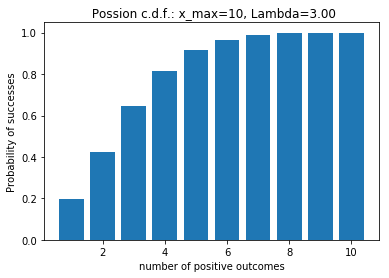

In [5]:
# graph of poisson c.d.f.:

import scipy, scipy.stats
import matplotlib.pyplot as plt

N = 10                                   # maximum number of occurances
Lambda = 3                               # parameter lambda

x = scipy.linspace(1,N,N)
geometrical = scipy.stats.poisson.cdf(x,Lambda)

plt.bar(x, geometrical)

plt.xlabel('number of positive outcomes')
plt.ylabel('Probability of successes')
plt.title(' Possion c.d.f.: x_max=%i, Lambda=%.2f' % (N,Lambda))
plt.show()

## Discrete uniform distribution on $m, m+1, ..., n$

__The mean:__ $$\mu = E(X)=\dfrac{m+n}{2} $$

__The variance:__ $$\sigma ^2 = V(X)=\dfrac{1}{12} (n-m)(n-m+2) $$

__The p.m.f.:__
$$ p(x) = \dfrac{1}{n-m +1} \ \ \ \ \ \ \ \ x= m,m+1,m+1,....,n.$$
, where $m$ is the mimimum and $n$ is the maximum attainable value.

__The c.d.f.:__
$$F(x) = P(X \leq x) = \dfrac{x-m+1}{n-m+1} \ \ \ \ \ \ \ x=m,m+1,m+2,...., n.$$ 

In [1]:
# p.m.f. of discrete uniform distribution

def p(m,n,x):
    return 1 / n-m+1 

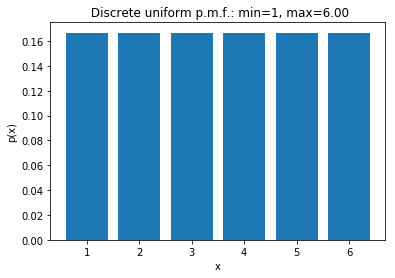

In [173]:
# graph for p.m.f. of discrete uniform distribution

import numpy as np
import matplotlib.pyplot as plt


def p(m,n):
    return 1 / (n-m+1)

m = 1                                    # minimum attainable value 
n = 6                                    # maximum attainable value


x = np.arange (m,n+1)
y = p(m,n)

plt.bar(x, y)

plt.xlabel('x')
plt.ylabel('p(x)')
plt.title(' Discrete uniform p.m.f.: min=%i, max=%.2f' % (m,n))
plt.show()

In [2]:
# c.d.f. of discrete uniform distribution:
def F(m,n,x):
    return (x-m+1) / (n-m+1)

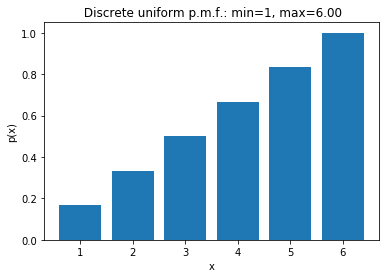

In [176]:
# graph of c.d.f. of discrete uniform distribution
import numpy as np
import matplotlib.pyplot as plt


def F(m,n):
    return (x-m+1) / (n-m+1)

m = 1                                    # minimum attainable value 
n = 6                                    # maximum attainable value


x = np.arange (m,n+1)
y = F(m,n)

plt.bar(x, y)

plt.xlabel('x')
plt.ylabel('p(x)')
plt.title(' Discrete uniform p.m.f.: min=%i, max=%.2f' % (m,n))
plt.show()

# Continuous Probability Distributions

__The mean of a continuous distribution with p.d.f. $f(x)$:__ $$\mu = E(X)=\int x f(x) dx $$

__The variance of a continuous random variable with p.d.f. $f(x)$:__ $$\sigma^2 = V(X)=E[(X-\mu)^2]= \int (x-\mu)^2 f(x) dx $$
also:
$$ \sigma^2 = V(X)= E(X^2)-\mu^2$$
("the variance equals the mean of the squares minus the square of the mean")

## Continuous uniform distribution, $U(a,b)$

__The mean:__
$$ \mu=E(X) = \dfrac{a+b}{2}$$

__The variance:__
$$ \sigma^2=V(X) = \dfrac{1}{12}(b-a)^2$$ 

__The p.d.f.  $X \sim U(a,b)$:__

$$f(x) = \frac{1}{b-a}, \ \ \ \ \ \ a<x<b$$

__The c.d.f. of  $X \sim U(a,b)$:__

$$F(x) = P(X \leq x) =  \frac{x-a}{b-a}, \ \ \ \ \ \ a<x<b$$

## Standard uniform distribution

__The p.d.f. of the the standard uniform distribution $V\sim U(0,1)$:__
$$ f(v) = 1, \ \ \ \ \ 0<v<1$$

__The C.d.f. of the the standard uniform distribution $V\sim U(0,1)$:__
$$F(v) = v, \ \ \ \ \ \ 0<v<1$$

## Exponential distribution, $M(\lambda)$

A random variable $X$ has an __exponential distribution__ with parameter $\lambda$, where $\lambda > 0$, if it has:

__Examples:__
 - 

__The mean:__ $$\mu = E(X)= \frac{1}{\lambda} $$

__The variance:__ 
$$\sigma ^2 =V(X)= \frac{1}{\lambda^2} $$

__The standard deviation:__ 
$$\sigma  =\sqrt{V(X)}= \frac{1}{\lambda} $$

__The p.d.f.  $X \sim M(\lambda)$:__

$$f(x) = \lambda e^{-\lambda x}, \ \ \ \ \ \ \ \ x>0$$

__The c.d.f.:__

$$F(x) = 1- e^{\lambda x}, \ \ \ \ \ \ \ \ x>0$$

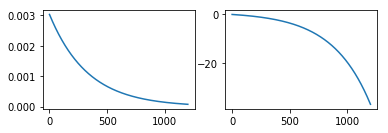

In [19]:
import numpy as np
import matplotlib.pyplot as plt

Lambda  = 67/22120
x = np.linspace(0, 1200, 1000)


# p.d.f. of eponential distribution
def exponential_pdf(Lambda,x):
        return Lambda * np.exp(-Lambda * x)
    
    
# c.d.f. of exponential distribution
def exponential_cdf(Lambda,x):
    return 1 - np.exp(Lambda * x)


plt.figure()
plt.subplot(2,2,1); plt.plot(x, exponential_pdf(Lambda, x))                          # Upper left
plt.subplot (2,2,2); plt.plot(x, exponential_cdf(Lambda, x))                # Upper right

plt.show()

In [ ]:
import scipy, scipy.stats
import numpy as np
import matplotlib.pyplot as plt

n = 6                            # number of trials
p =  0.2                        # probability of each successfull outcome
number_of_runs = 10000           # number of simulation runs               

binom_sim = scipy.stats.expon

plt.hist(binom_sim, bins = n, normed = True)

plt.xlabel('Number of successes')
plt.ylabel('Probability of successes')
plt.title('Random binomial p.m.f.: n=%i, p=%.2f' % (n,p))
plt.show()

# Linear regression

In [20]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
data = pd.read_csv("cholesterol.csv", header = [0]) 

# the data
N = data['Age'].count()
response = data[["Cholesterol"]]
predictor = data[["Age"]]


# Create data points
#N = 10  
#x = np.random.rand(N)
#y = np.random.rand(N)

# desired probability for confidence interval
probability = 0.95 

# Regression function
xbar = np.mean(predictor)
ybar = np.mean(response)
Sxx = np.sum((predictor - xbar) ** 2)
Sxy = np.sum((predictor - xbar) * (response - ybar))
beta_hat = Sxy / Sxx
alpha_hat = ybar - beta_hat * xbar

# Least square line
x_values = np.linspace(min(x_values), max(x_values), 100)
y_values = alpha_hat + beta_hat * x_values
print(' ')
print('The least square line is given by:')
print('y = '+ str(alpha_hat) +' + ' + str(beta_hat) +' x')

# students t-value for two sided confidence interval
from scipy.stats import t
p = 0.5 + (probability / 2) # probability converted to lookup t-value
df = N - 2                  # degrees of freedom  
t_value = t.ppf(p, df)

# Fitted values:
y_hat = alpha_hat + beta_hat * predictor

# Residuals:
w = response - y_hat

# unbiased estimator of variance:
variance  = (np.sum(y - y_hat)) / (N - 2)

# confidence interval for slope of beta_hat:
beta_lower = beta_hat - t_value * (np.sqrt(variance))/(np.sqrt(Sxx))
beta_upper = beta_hat + t_value * (np.sqrt(variance))/(np.sqrt(Sxx))
y_values_lower = alpha_hat + beta_lower * x_values
y_values_upper = alpha_hat + beta_upper * x_values


# Linear regression Plot
plt.scatter(predictor, response)
plt.plot(x_values, y_values,'r')
# plt.plot(x_values, y_values_lower, 'y')
# plt.plot(x_values, y_values_upper, 'y')
plt.title('Linear regression model')
plt.xlabel('Predictor')
plt.ylabel('Response')
ax = plt.gca()
lines = ax.get_lines()
lines[0].set_label('Least square line')
#lines[1].set_label('Confidence interval')
ax.legend()
plt.show()


# Resiual plot
plt.scatter(y_hat, w )
plt.title('Residual plot')
plt.axhline(0, color='black')
plt.xlabel('Fitted value $\hat{y}$')
plt.ylabel('Residuals $w$')
ax.legend()
plt.show()

# Normal probability plot of the residuals
from scipy import stats
w = stats.norm.rvs(loc=0, scale=1, size=N)
stats.probplot(w, plot=plt, dist='norm')
plt.show()

# unbiased estimator of the variance:
variance_estimate  = np.sum(response - y_hat)/( N - 2)
print('an unbiased estimator of the variacne is ' + str(variance_estimate))

NameError: name 'x_values' is not defined

In [ ]:
xbar

## Fitting experimental data to a model

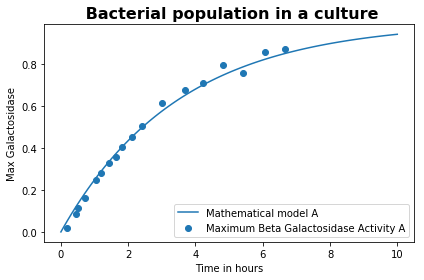

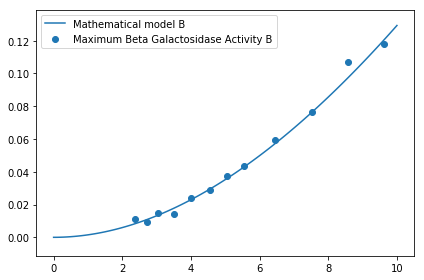

<Figure size 432x288 with 0 Axes>

In [21]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed Feb 28 20:01:56 2018

Purpose: Exercise of fitting a mathematical model onto experimental data from two files.
    

@author: stephangoldberg
"""

import numpy as np
import matplotlib.pyplot as plt


# importing the datasets (each set has 2 columns)
data_set_A = np.loadtxt('g149novickA.csv', delimiter=',')
data_set_B = np.loadtxt('g149novickB.csv', delimiter=',')


# choosig from data_set_B only the entries where the first column is smaller than 10:
B = data_set_B[(data_set_B[:,0:1]<10).all(1)]

# slicing the two data sets(separating the columns):
time_in_hours_A = data_set_A[:, 0]  #first column
max_beta_galactosidase_activity_A = data_set_A[:, 1] # second column

time_in_hours_B = B[:, 0] #first column
max_beta_galactosidase_activity_B = B[:, 1] #second column

# creating a mathematical model, which represents the data 
# Define parameters:
A = 1
tau_A = 3.5
tau_B = 18

# Defining the range of x-values for both models
time_model = np.linspace (0,10,101)

# Defining the y-values (These are the formulas for the models)
V_t = 1 - np.exp(- time_model / tau_A)
W_t = A * (np.exp(-time_model/tau_B) - 1 + time_model / tau_B)

# plotting the actual data and the model:
plt.scatter(time_in_hours_A, max_beta_galactosidase_activity_A, label = "Maximum Beta Galactosidase Activity A")
plt.plot(time_model, V_t, label = "Mathematical model A")

ax = plt.gca()      # getting control of the axis
ax.set_xlabel("Time in hours")
ax.set_ylabel ("Max Galactosidase", size=10)
ax.set_title( " Bacterial population in a culture", size=16, weight="bold")
plt.legend()        # showing the labels of the plotted curves
plt.tight_layout()  # ensures that labels of x- or y-axis are not cut off
plt.figure()    # plotting the first figure with data_set_A

plt.scatter(time_in_hours_B, max_beta_galactosidase_activity_B, label = "Maximum Beta Galactosidase Activity B")
plt.plot(time_model, W_t, label = "Mathematical model B")
ax.set_xlabel("Time in hours")
ax.set_ylabel ("Max Galactosidase", size=10)
ax.set_title( " Bacterial population in a culture", size=16, weight="bold")
plt.legend()        # showing the labels of the plotted curves
plt.tight_layout()  # ensures that labels of x- or y-axis are not cut off
plt.figure()    #plotting the second figure with data_set_B



plt.show()   # showing the plot